In [1]:
using QuantumOptics
using PyPlot

Precompiling QuantumOptics
  ✓ IteratorInterfaceExtensions
  ✓ MuladdMacro
  ✓ ConcreteStructs
  ✓ SimpleUnPack
  ✓ StatsAPI
  ✓ Tricks
  ✓ RationalRoots
  ✓ ExprTools
  ✓ ADTypes
  ✓ PositiveFactorizations
  ✓ AbstractFFTs
  ✓ Calculus
  ✓ UnPack
  ✓ IntegerMathUtils
  ✓ FunctionWrappers
  ✓ UnsafeArrays
  ✓ HalfIntegers
  ✓ CommonSolve
  ✓ Combinatorics
  ✓ CompilerSupportLibraries_jll
  ✓ InverseFunctions
  ✓ ManualMemory
  ✓ OffsetArrays
  ✓ PoissonRandom
  ✓ Reexport
  ✓ DataValueInterfaces
  ✓ EnumX
  ✓ SIMDTypes
  ✓ Compat
  ✓ Requires
  ✓ OrderedCollections
  ✓ NaNMath
  ✓ GenericSchur
  ✓ FillArrays
  ✓ DocStringExtensions
  ✓ IfElse
  ✓ LRUCache
  ✓ SciMLStructures
  ✓ Inflate
  ✓ LinearMaps
  ✓ PackageExtensionCompat
  ✓ EnzymeCore
  ✓ DataAPI
  ✓ CpuId
  ✓ ConstructionBase
  ✓ FastClosures
  ✓ StaticArraysCore
  ✓ TupleTools
  ✓ IrrationalConstants
  ✓ FastExpm
  ✓ SuiteSparse
  ✓ Rmath_jll
  ✓ GSL_jll
  ✓ IntelOpenMP_jll
  ✓ TableTraits
  ✓ Functors
  ✓ KLU
  ✓ QuantumInte

# Effective 1-ptl problem for square well

In [2]:
xmax = 50
xmin = -xmax

Nsteps = 1000
L = xmax - xmin

dx = 0.1
Nsteps = length(-xmax:dx:xmax)

1001

In [3]:
b_position = PositionBasis(xmin, xmax, Nsteps)
xpoints = samplepoints(b_position)

x = position(b_position)
p = momentum(b_position)

m = 0.5

V0 = 0.1
r0 = 1
w0 = 0.01

V_SQWell = r -> V0*(tanh( (abs(r)-r0)/w0 )-1)/2  

#1 (generic function with 1 method)

In [4]:
diff(xpoints)[1]

0.09990009990009696

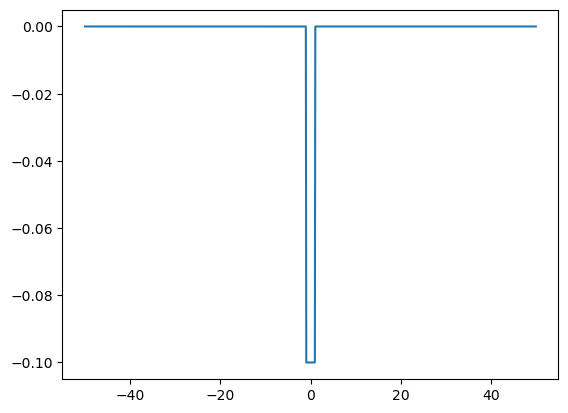

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd560704a10>

In [5]:
plot(xpoints, V_SQWell.(xpoints))

In [6]:
V = potentialoperator(b_position, V_SQWell)
Hkin = p^2/(2*m)
H = Hkin + V;

In [7]:
E, states = eigenstates((H + dagger(H))/2, 6);
println(E)

[-0.008824774807183442, 0.0009855989381409463, 0.005859999255818472, 0.008870411285080586, 0.021231814036785906, 0.024640146821840004]


In [8]:
#E, states = eigenstates((H + dagger(H))/2);

In [9]:
#plot(1:Nsteps,E, ".")

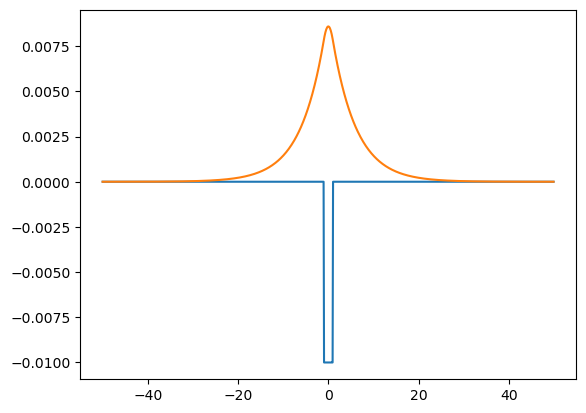

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5607e0550>

In [10]:
plot(xpoints, V_SQWell.(xpoints)/V0/L)
plot(xpoints, abs.(states[1].data).^2)